## About the dataset

***googleplaystore.csv*** dataset column descriptions:

**1. App:** Name of the application.

**2. Category:** The category to which the app belongs.

**3. Rating:** Overall user rating of the app (as when scraped).

**4. Reviews:** The total number of user reviews for the app (as when scraped).

**5. Size:** The size of the app (as when scraped).

**6. Installs:** Number of user downloads/installs for the app (as when scraped).

**7. Type:** Specifies whether the app is **Paid** or **Free**.

**8. Price:** The price of the app (as when scraped).

**9. Content Rating:** The target audience age group of the app, such as:
  - **Children**
  - **Mature 21+**
  - **Adult**

**10. Genres:** Apps can belong to multiple genres in addition to their main category.

  - Example: A musical family game may belong to both **Music** and **Family** genres.

***googleplaystore_user_reviews.csv*** dataset column descriptions:

This dataset contains the **most relevant 100 reviews** for each app on the Google Play Store. Each review has been pre-processed and labeled with three sentiment-related attributes.

**1. App:** Name of the application to which the review belongs.

**2. Translated_Review:** User review text that has been pre-processed and translated into English.

**3. Sentiment:** The overall sentiment of the user review.
   - Possible Values:
     - **Positive**
     - **Negative**
     - **Neutral**

**4. Sentiment_Polarity:** A numerical score representing the sentiment polarity of the review.
   - Range:
     - **Positive values** indicate a **positive** sentiment.
     - **Negative values** indicate a **negative** sentiment.
     - **Values near 0** indicate a **neutral** sentiment.

**5. Sentiment_Subjectivity:** A numerical score representing the subjectivity of the review.
   - Range:
     - **Values close to 1** indicate **high subjectivity** (opinion-based).
     - **Values close to 0** indicate **low subjectivity** (fact-based).


## Importing Necessary Libraries

In [1]:
import zipfile
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import random
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display

# EDA of googleplaystore.csv

In [2]:
# Define the zip file path
zip_path = "/content/archive (3).zip"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted_folder")

# Verify extracted files
os.listdir("/content/extracted_folder")


['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']

In [3]:
apps = pd.read_csv("/content/extracted_folder/googleplaystore.csv")

In [4]:
apps

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [5]:
apps.shape

(10841, 13)

In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

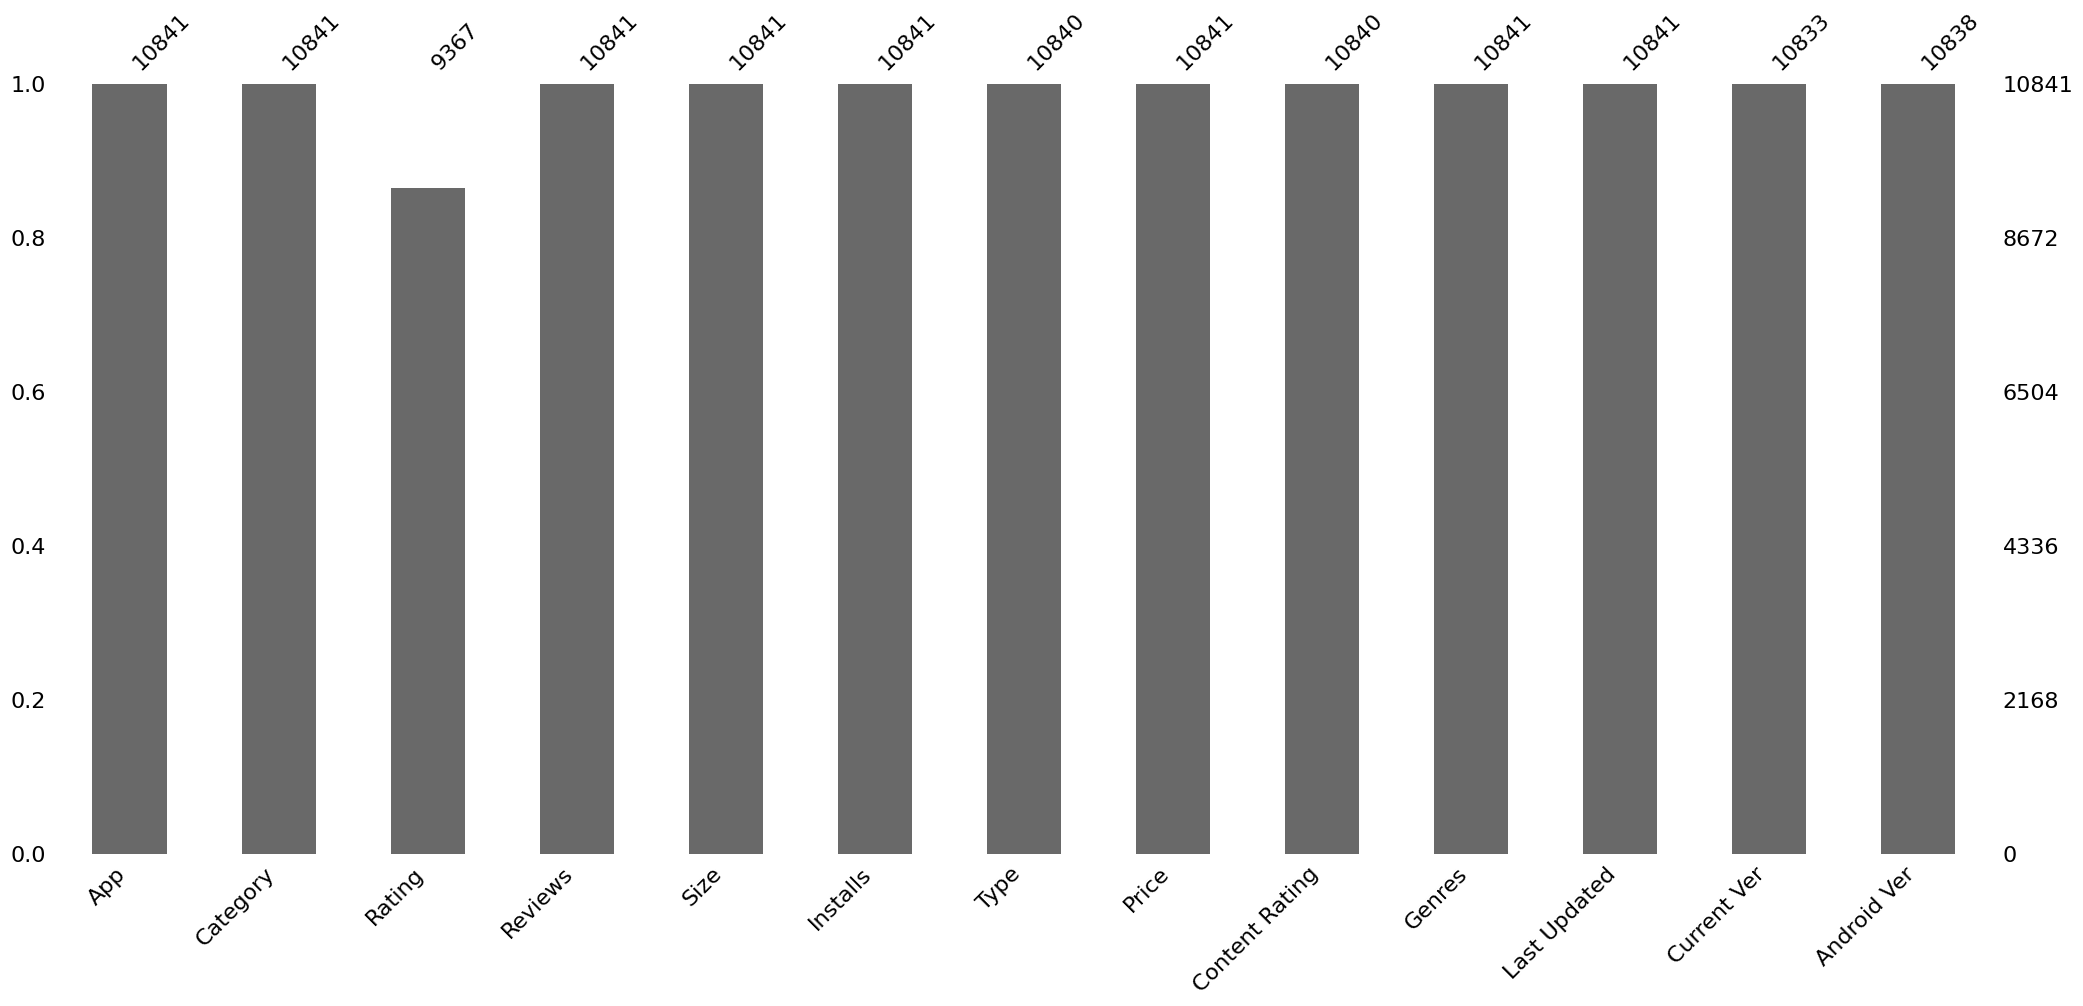

In [9]:
missingno.bar(apps);

In [4]:
n = 5
apps.sample(n)

App          Category  \
2419                     Advanced Comprehension Therapy           MEDICAL   
5170                                      Sherbourne AH           MEDICAL   
2371                                  EMT-B Pocket Prep           MEDICAL   
10603                    Florida Travel Guide - TOURIAS  TRAVEL_AND_LOCAL   
4410   Rock N' Cash Casino Slots -Free Vegas Slot Games              GAME   

       Rating Reviews Size  Installs  Type   Price Content Rating  \
2419      NaN       3  62M      100+  Paid  $24.99       Everyone   
5170      NaN       1  29M       50+  Free       0       Everyone   
2371      4.5    2951  16M   50,000+  Free       0       Everyone   
10603     3.8      80  37M   10,000+  Free       0       Everyone   
4410      4.7    6187  33M  100,000+  Free       0           Teen   

               Genres       Last Updated  Current Ver   Android Ver  
2419          Medical    October 5, 2017          1.2  4.0.3 and up  
5170          Medical  February 27, 2018  300000.0.98  4.0.3 and up  
2371          Medical      July 11, 2018        4.5.2    4.4 and up  
10603  Travel & Local      July 30, 2018         3.21    4.0 and up  
4410           Casino      July 27, 2018       1.15.0  4.0.3 and up

In [5]:
print("Unique values in 'Type' column:", apps.Type.unique())

Unique values in 'Type' column: ['Free' 'Paid' nan '0']


In [6]:
type_zero_rows = apps[apps['Type'] == "0"]

if not type_zero_rows.empty:
    print("Rows where 'Type' is '0':")
    display(type_zero_rows)
else:
    print("No rows found where 'Type' is '0'.")


Rows where 'Type' is '0':


App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

The row at index 10472 appears to be shifted, which suggests that its columns do not align correctly with their respective values. So we will delete this row.

In [7]:
print("Unique values in 'Content Rating' column:", apps["Content Rating"].unique())

Unique values in 'Content Rating' column: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [8]:
# Extract unexpected characters in "Size"
unique_unexpected_chars = apps['Size'].astype(str).apply(lambda x: re.sub(r'[0-9.\sMk]', '', str(x)))
unique_unexpected_chars = unique_unexpected_chars.unique()
unique_unexpected_chars = [char for char in unique_unexpected_chars if char.strip()]

# Extract letters next to numbers
unique_letters_next_to_numbers = apps['Size'].astype(str).apply(lambda x: ''.join(re.findall(r'(?<=\d)[a-zA-Z]+', str(x))))
unique_letters_next_to_numbers = unique_letters_next_to_numbers.unique()
unique_letters_next_to_numbers = [char for char in unique_letters_next_to_numbers if char.strip()]

print("Unique unexpected characters found in 'Size':", unique_unexpected_chars, unique_letters_next_to_numbers)

Unique unexpected characters found in 'Size': ['Varieswithdevice', ',+'] ['M', 'k']


In [9]:
# Count the values having $ in the 'Price' column
print(apps['Price'].loc[apps['Price'].str.contains('\$')].value_counts().sum())

print(apps['Price'].loc[(apps['Price'].str.contains('0')) & (~apps['Price'].str.contains('\$'))].value_counts().sum())

800
10040


There is only the "$" character to remove from the "Price" column, and one row (10472-th) with an unexpected "Price" value that needs to be removed.

In [10]:
# Clean "Installs" and "Price" columns
chars_to_remove = ['+', '$']
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).apply(lambda x: x.replace(char, ''))

    if col == "Installs":
        apps[col] = apps[col].apply(lambda x: x.replace(',', ''))
        apps[col] = pd.to_numeric(apps[col], errors='coerce').astype('Int64')

    elif col == "Price":
        apps[col] = apps[col].apply(lambda x: x.replace(',', '.'))
        apps[col] = pd.to_numeric(apps[col], errors='coerce')

# Clean "Reviews" column (remove non-numeric characters and convert to integer)
apps["Reviews"] = apps["Reviews"].astype(str).str.replace(r'\D', '', regex=True)
apps["Reviews"] = pd.to_numeric(apps["Reviews"], errors='coerce').astype('Int64')

# Clean and process "Size" column
apps['Size'] = apps['Size'].astype(str).replace('Varies with device', np.nan)

# Convert 'k' to MB and remove 'M', 'k' letters
apps['Size'] = apps['Size'].apply(lambda x: float(x.replace('k', '')) / 1024 if 'k' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(x.replace('M', '')) if 'M' in str(x) else x)

# Convert to numeric type
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')
apps['Size'] = apps['Size'].round(2)
apps.rename(columns={'Size': 'Size in MBs'}, inplace=True)

# Convert "Last Updated" to datetime format
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')

apps = apps.drop(index=10472)
print(f"Removed 1 unexpected row.")

apps.info()
apps.head()

Removed 1 unexpected row.
<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  Int64         
 4   Size in MBs     9145 non-null   float64       
 5   Installs        10840 non-null  Int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: Int64(2), datetime64[ns](1), float64(3), object(7)
memory usage: 1.2+ MB


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size in MBs  Installs  Type  Price Content Rating  \
0      159         19.0     10000  Free    0.0       Everyone   
1      967         14.0    500000  Free    0.0       Everyone   
2    87510          8.7   5000000  Free    0.0       Everyone   
3   215644         25.0  50000000  Free    0.0           Teen   
4      967          2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [15]:
apps.shape

(10840, 13)

In [16]:
apps.duplicated().sum()

483

In [17]:
apps[apps['App'].duplicated(keep=False)].sort_values(by='App')

App            Category  Rating  Reviews  \
1393           10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
1407           10 Best Foods for You  HEALTH_AND_FITNESS     4.0     2490   
2543      1800 Contacts - Lens Store             MEDICAL     4.7    23160   
2322      1800 Contacts - Lens Store             MEDICAL     4.7    23160   
2385      2017 EMRA Antibiotic Guide             MEDICAL     4.4       12   
...                              ...                 ...     ...      ...   
3202        trivago: Hotels & Travel    TRAVEL_AND_LOCAL     4.2   219848   
3118        trivago: Hotels & Travel    TRAVEL_AND_LOCAL     4.2   219848   
3103        trivago: Hotels & Travel    TRAVEL_AND_LOCAL     4.2   219848   
8291  wetter.com - Weather and Radar             WEATHER     4.2   189310   
3652  wetter.com - Weather and Radar             WEATHER     4.2   189313   

      Size in MBs  Installs  Type  Price Content Rating            Genres  \
1393          3.8    500000  Free   0.00   Everyone 10+  Health & Fitness   
1407          3.8    500000  Free   0.00   Everyone 10+  Health & Fitness   
2543         26.0   1000000  Free   0.00       Everyone           Medical   
2322         26.0   1000000  Free   0.00       Everyone           Medical   
2385          3.8      1000  Paid  16.99       Everyone           Medical   
...           ...       ...   ...    ...            ...               ...   
3202          NaN  50000000  Free   0.00       Everyone    Travel & Local   
3118          NaN  50000000  Free   0.00       Everyone    Travel & Local   
3103          NaN  50000000  Free   0.00       Everyone    Travel & Local   
8291         38.0  10000000  Free   0.00       Everyone           Weather   
3652         38.0  10000000  Free   0.00       Everyone           Weather   

     Last Updated         Current Ver         Android Ver  
1393   2017-02-17                 1.9        2.3.3 and up  
1407   2017-02-17                 1.9        2.3.3 and up  
2543   2018-07-27               7.4.1          5.0 and up  
2322   2018-07-27               7.4.1          5.0 and up  
2385   2017-01-27               1.0.5        4.0.3 and up  
...           ...                 ...                 ...  
3202   2018-08-02  Varies with device  Varies with device  
3118   2018-08-02  Varies with device  Varies with device  
3103   2018-08-02  Varies with device  Varies with device  
8291   2018-08-06  Varies with device  Varies with device  
3652   2018-08-06  Varies with device  Varies with device  

[1979 rows x 13 columns]

In [11]:
# Remove the duplicates
apps.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {apps.shape[0]}")

Number of rows after removing duplicates: 10357


So far, we have applied the following transformations to clean the dataset:

*   "Installs" and "Price" → Removed '+', '$', and ',', converted to numeric types.
*   "Reviews" → Removed non-numeric characters, converted to integer.
*   "Size" → Converted kB to MB, removed 'M', 'k', handled "Varies with device" as NaN, rounded values to two decimal places, and renamed the column to "Size in MBs".
*   "Last Updated" → Converted to datetime format.
*   "Current Ver" and "Android Ver" → Replaced "Varies with device" with NaN.
*   Removed one row with unexpected values.
*   Removed duplicates in the dataframe.

In [12]:
apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size in MBs       1526
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [20]:
apps['Installs'].max()

1000000000

In [12]:
# Making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
apps['Installs_category'] = pd.cut(apps['Installs'], bins=bins, labels=labels)

In [22]:
apps.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size in MBs  Installs  Type  Price Content Rating  \
0      159         19.0     10000  Free    0.0       Everyone   
1      967         14.0    500000  Free    0.0       Everyone   
2    87510          8.7   5000000  Free    0.0       Everyone   
3   215644         25.0  50000000  Free    0.0           Teen   
4      967          2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08  Varies with device    4.2 and up   
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up   

    Installs_category  
0            Moderate  
1                High  
2           Very High  
3           Top Notch  
4  More than moderate

In [23]:
apps['Installs_category'].value_counts()

Installs_category
Low                   2132
High                  2005
Very High             1815
More than moderate    1603
Moderate              1502
Top Notch              751
Very low               534
no                      15
Name: count, dtype: int64

* Most apps fall into Low, High, or Very High install categories.
* A small number of apps achieve "Top Notch" status.
* There is potential data inconsistency with the "no" category, which should be checked.

In [14]:
# Filter rows where "Installs_category" is "no"
no_installs_rows = apps[apps['Installs_category'] == "no"]

if not no_installs_rows.empty:
    print("Rows with 'no' in Installs_category:")
    print(no_installs_rows.to_string(index=False))
else:
    print("No rows found with 'no' in Installs_category.")


Rows with 'no' in Installs_category:
                                         App           Category  Rating  Reviews  Size in MBs  Installs Type  Price Content Rating           Genres Last Updated        Current Ver        Android Ver Installs_category
Popsicle Launcher for Android P 9.0 launcher    PERSONALIZATION     NaN        0          5.5         0 Paid   1.49       Everyone  Personalization   2018-07-11                1.1         4.2 and up                no
                     Ak Parti Yardım Toplama             SOCIAL     NaN        0          8.7         0 Paid  13.99           Teen           Social   2017-07-28          3.4.4.3.3         4.1 and up                no
                      AP Series Solution Pro             FAMILY     NaN        0          7.4         0 Paid   1.99       Everyone        Education   2017-07-30                1.3         4.0 and up                no
                  Ain Arabic Kids Alif Ba ta             FAMILY     NaN        0         33.0  

Most apps are "Paid", some of these are high-priced paid apps that likely have no installs because of their cost.

In [13]:
# Find non-numeric unique values in "Current Ver"
unique_non_numeric_versions = apps[apps['Current Ver'].str.contains(r'^[A-Za-z\s]+$', na=False)]['Current Ver'].unique()

print(unique_non_numeric_versions)


['Varies with device' 'Initial' 'Natalia Studio Development' 'closed'
 'newversion' 'Final' 'App copyright' 'Copyright' 'Gratis' 'KM' 'HTTPs'
 'Human Dx' 'BlueOrange' 'MONEY']


In [14]:
invalid_values = ['MONEY', 'HTTPS', 'Gratis', 'App copyright', 'Copyright',
                  'Human Dx', 'BlueOrange', 'KM', 'Initial', 'Final',
                  'closed', 'newversion', 'Natalia Studio Development']

invalid_count = apps['Current Ver'].isin(invalid_values).sum()

print(f"Number of invalid values (excluding 'Varies with device'): {invalid_count}")


Number of invalid values (excluding 'Varies with device'): 13


There are 13 invalid values in the "Current Ver" column. Since we do not plan to analyze this column, we will keep these values unchanged and will not fix or delete them.


In [24]:
print(apps['Android Ver'].unique())


['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


The "Android Ver" column contains some invalid values. However, similar to the "Current Ver" column, we will keep them unchanged as we do not plan to use this column in our analysis.

In [25]:
apps.isnull().sum().sort_values(ascending=False)

Size in MBs          1526
Rating               1465
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

In [26]:
apps.isnull().sum().sum()

3002

In [29]:
# Find the percentage of missing values in each column of the dataset
(apps.isnull().sum() / len(apps) * 100).sort_values(ascending=False)

Size in MBs          14.733996
Rating               14.145023
Current Ver           0.077242
Android Ver           0.019311
Type                  0.009655
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

In [15]:
# Remove the rows having null values in the 'Current Ver', 'Android Ver' and 'Type' columns
apps.dropna(subset=['Current Ver', 'Android Ver', 'Type'], inplace=True)

We removed the rows with missing values in the 'Current Ver', 'Android Ver', and 'Type' columns, as they are very less in number.

In [31]:
apps.isnull().sum().sort_values(ascending=False)

Size in MBs          1525
Rating               1460
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

In [32]:
print(f"Length of the dataframe after removing null values: {len(apps)}")

Length of the dataframe after removing null values: 10346


In 'Size in MBs' column we have converted 'Varies with device' values into null values, we do not need to impute, as every app has different size and nobody can predict that as nearly as possible.


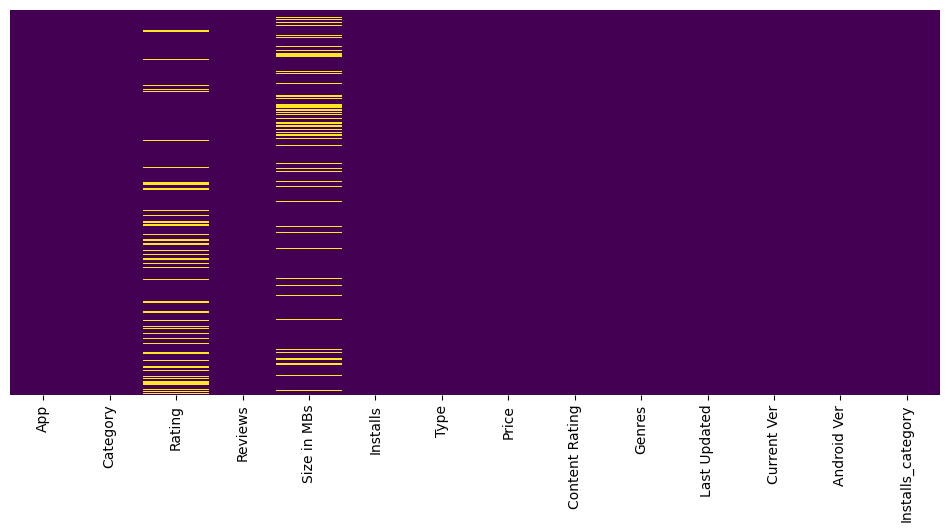

In [31]:
plt.figure(figsize=(12, 5))

# Plot the null values in each column
sns.heatmap(apps.isnull(), yticklabels=False, cbar=False, cmap='viridis');

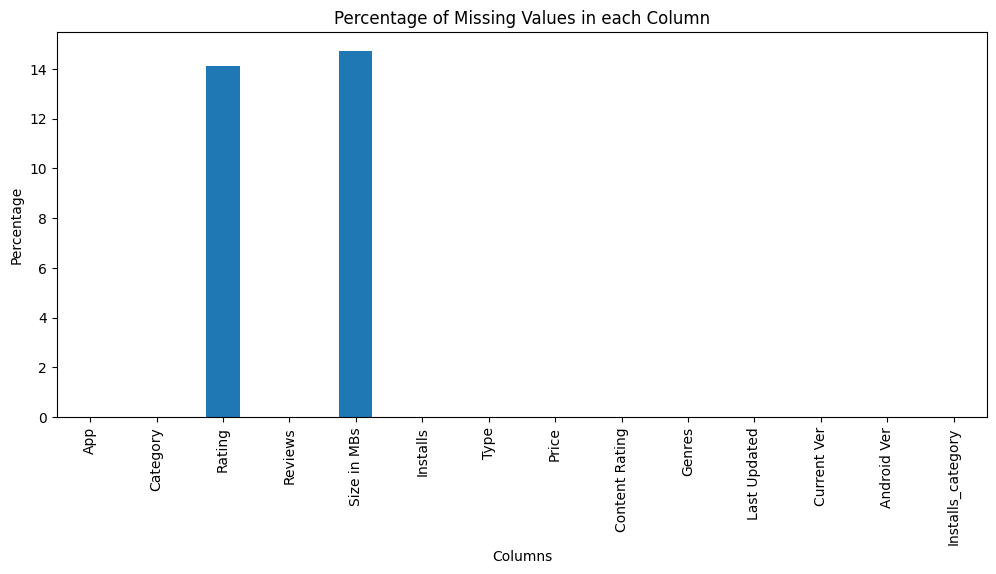

In [32]:
plt.figure(figsize=(12, 5))

# Plot the null values by their percentage in each column
missing_percentage = apps.isnull().sum()/len(apps)*100
missing_percentage.plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column');

<Axes: >

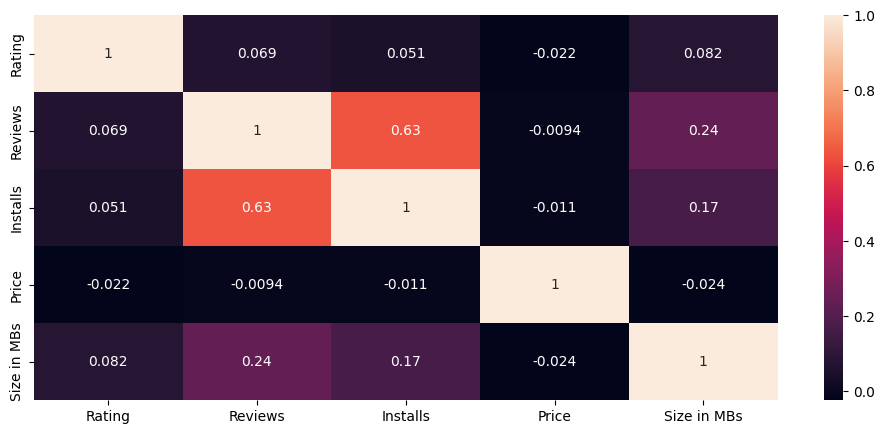

In [33]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(12, 5))
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size in MBs']
sns.heatmap(apps[numeric_cols].corr(), annot=True)

We can see that the "Reviews" column has a high correlation with the "Installs" column (0.63), which is quite good.
This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of the number of install.

In [17]:
apps.groupby('Installs_category')['Rating'].describe()

<ipython-input-17-bc68ec24d45c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apps.groupby('Installs_category')['Rating'].describe()


count      mean       std  min  25%  50%  75%  max
Installs_category                                                      
no                     0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Very low              81.0  4.637037  0.845199  1.0  4.8  5.0  5.0  5.0
Low                 1255.0  4.170040  0.829420  1.0  3.8  4.4  4.8  5.0
Moderate            1413.0  4.031352  0.605581  1.4  3.8  4.2  4.5  5.0
More than moderate  1571.0  4.094653  0.504221  1.6  3.9  4.2  4.5  4.9
High                2000.0  4.207100  0.378591  1.8  4.0  4.3  4.5  4.9
Very High           1815.0  4.285675  0.301071  2.0  4.1  4.3  4.5  4.9
Top Notch            751.0  4.372170  0.195374  3.1  4.3  4.4  4.5  4.8

In [18]:
# Fill missing values in "Rating" with the mean of each "Installs_category"
apps['Rating'] = apps['Rating'].fillna(apps.groupby('Installs_category')['Rating'].transform('mean'))

print(apps['Rating'].isna().sum())

14


<ipython-input-18-86ea00310e0a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apps['Rating'] = apps['Rating'].fillna(apps.groupby('Installs_category')['Rating'].transform('mean'))


In [19]:
# Fill any remaining NaNs with the overall mean rating
apps['Rating'] = apps['Rating'].fillna(apps['Rating'].mean())

print(apps['Rating'].isna().sum())

0


We replaced the missing values of 'Rating' with respect to the average given in each 'Installs Category'.

In [37]:
apps.describe()

Rating         Reviews  Size in MBs         Installs  \
count  10346.000000         10346.0  8821.000000          10346.0   
mean       4.204511   406333.770636    21.306250  14172659.715542   
min        1.000000             0.0     0.010000              0.0   
25%        4.094653            32.0     4.700000           1000.0   
50%        4.300000          1688.5    13.000000         100000.0   
75%        4.500000        46598.25    29.000000        1000000.0   
max        5.000000      78158306.0   100.000000     1000000000.0   
std        0.493160  2698179.074278    22.545817  80280899.856613   

              Price                   Last Updated  
count  10346.000000                          10346  
mean       1.031561  2017-11-14 14:51:45.200077312  
min        0.000000            2010-05-21 00:00:00  
25%        0.000000            2017-09-04 06:00:00  
50%        0.000000            2018-05-20 00:00:00  
75%        0.000000            2018-07-19 00:00:00  
max      400.000000            2018-08-08 00:00:00  
std       16.287252                            NaN

* We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.2 which is a good rating. On an average people give this rating.
* We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 (78+ Millions), and the mean is 406,333.77 which is a good number of reviews.
* The minimum price is 0, the maximum price is 400$.

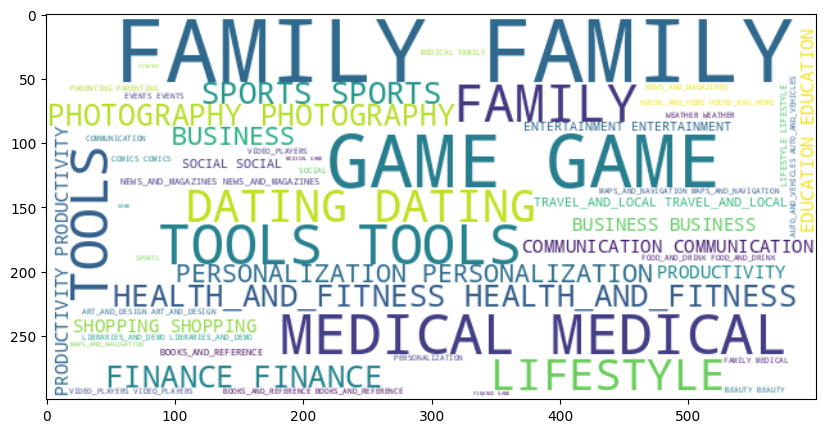

In [38]:
text_data=" ".join(apps['Category'])
wrdcld=WordCloud(width=600,height=300,background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wrdcld, interpolation='bilinear')
plt.show()

Categories like Family, Game, Medical and Tools appear prominently, suggesting they have a high number of apps.

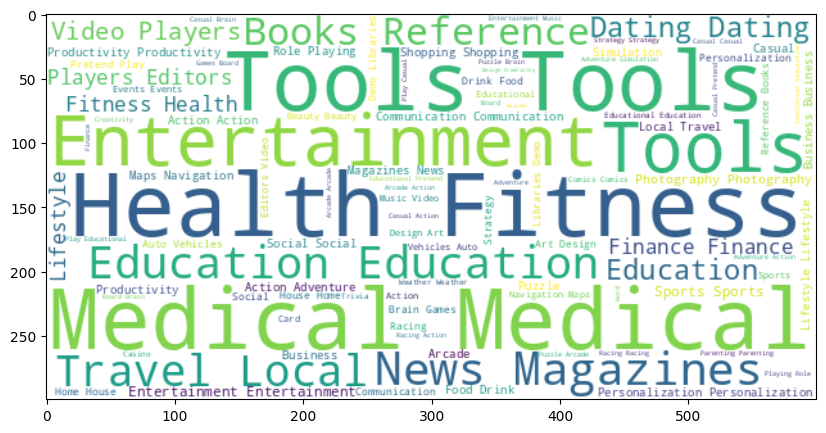

In [39]:
text_data=" ".join(apps['Genres'])
wrdcld=WordCloud(width=600,height=300,background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wrdcld, interpolation='bilinear')
plt.show()

Frequent genres include Tools, Medical, Entertainment, Health and Fitness, suggesting these are common app types.

Number of categories = 33


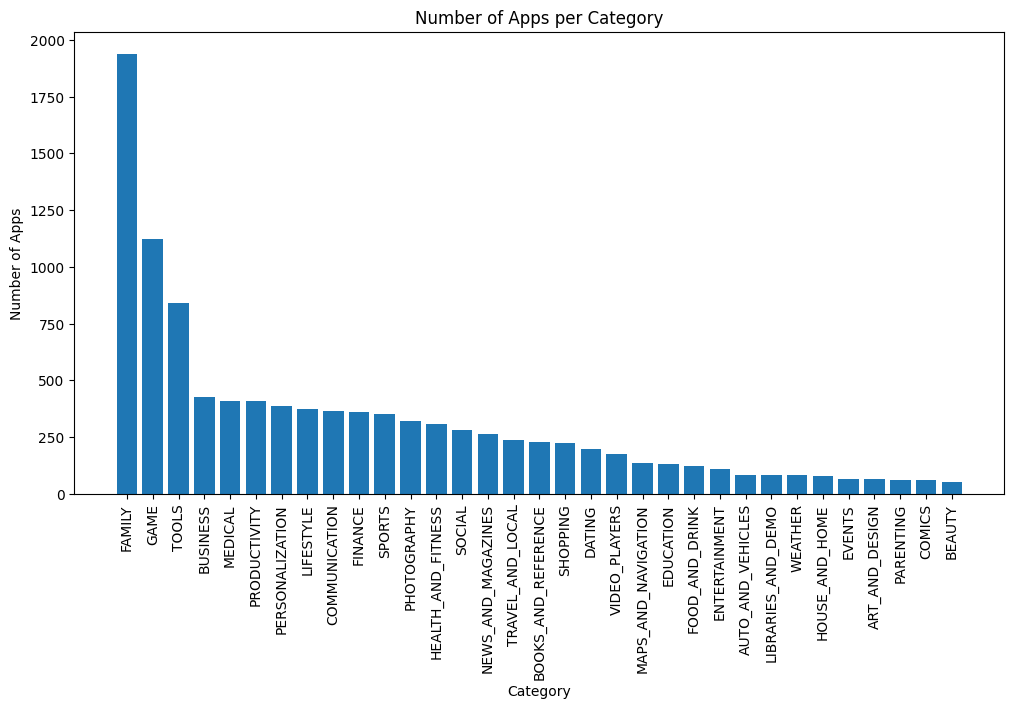

In [40]:
num_categories = len(apps['Category'].unique())
print('Number of categories =', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_num_apps_in_category.index, sorted_num_apps_in_category.values)

plt.xticks(rotation=90)

plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps per Category')

plt.show()

Family and Game apps have the highest market prevalence. Tools, Business and Medical apps are also at the top.

Number of genres = 119


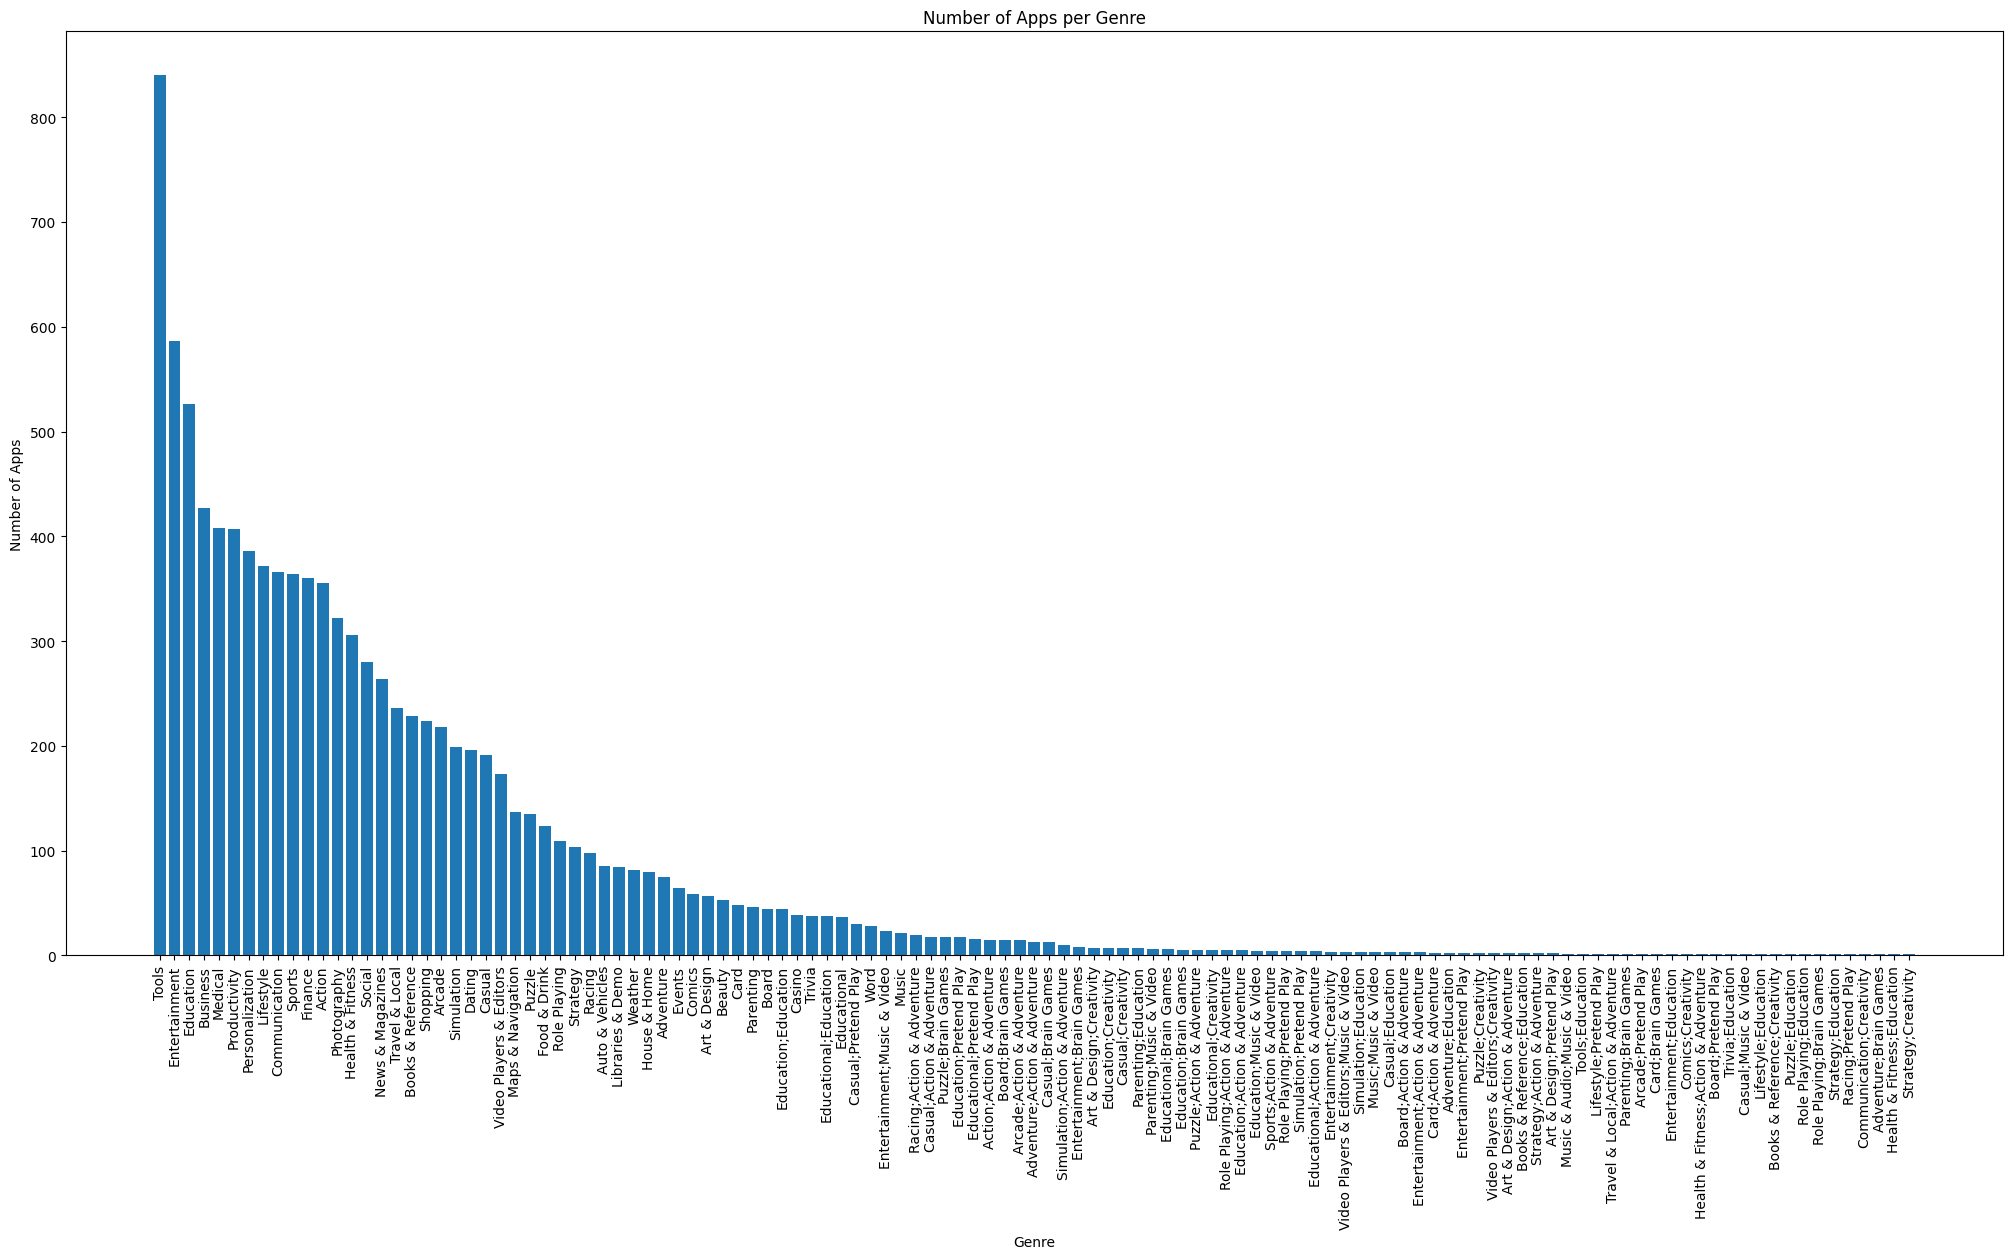

In [41]:
num_genres = len(apps['Genres'].unique())
print('Number of genres =', num_genres)

num_apps_in_genre = apps['Genres'].value_counts()

sorted_num_apps_in_genre = num_apps_in_genre.sort_values(ascending=False)

plt.figure(figsize=(25, 12))
plt.bar(sorted_num_apps_in_genre.index, sorted_num_apps_in_genre.values)

plt.xticks(rotation=90)

plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.title('Number of Apps per Genre')

plt.show()

Tools, Entertainment and Education are the most common genres.

Average app rating = 4.204510971377914


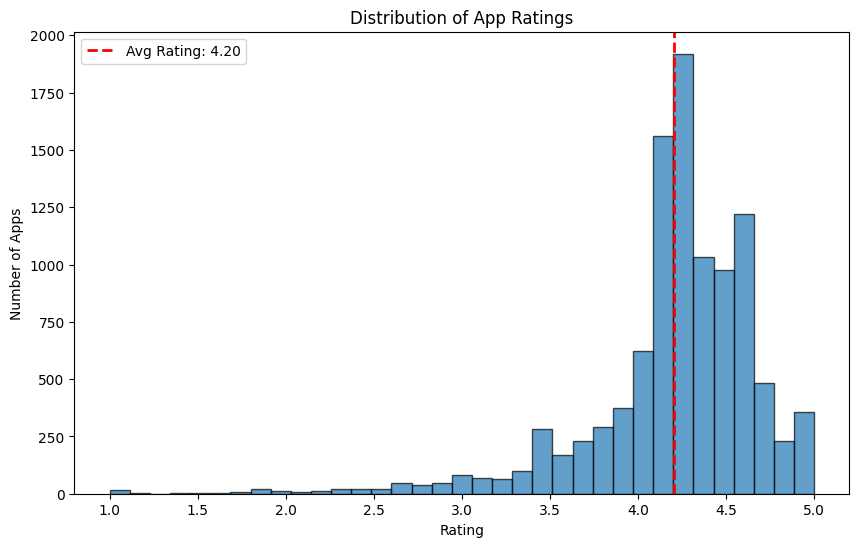

In [42]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating =', avg_app_rating)

plt.figure(figsize=(10, 6))
plt.hist(apps['Rating'].dropna(), bins=35, edgecolor='black', alpha=0.7)

plt.axvline(avg_app_rating, color='red', linestyle='dashed', linewidth=2, label=f'Avg Rating: {avg_app_rating:.2f}')

plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.legend()

plt.show()

The average volume of ratings across all app categories is 4.2. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

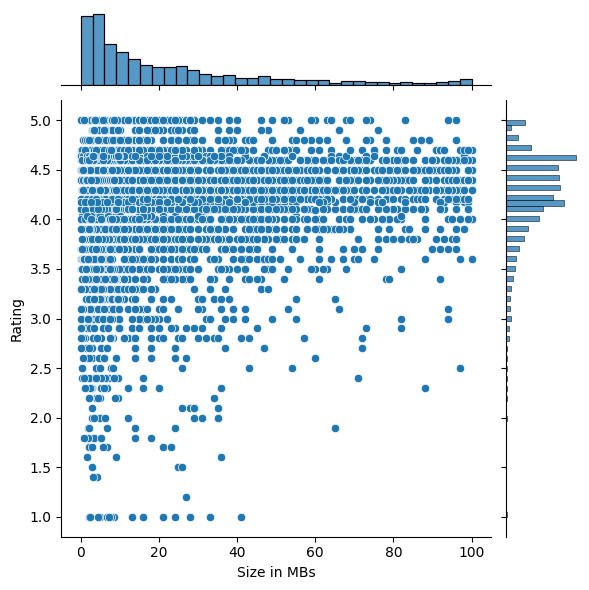

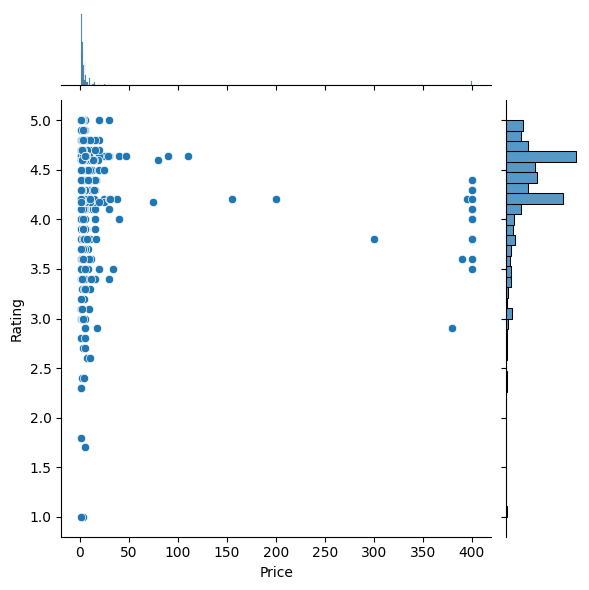

In [38]:
size_and_rating = apps[(~apps['Rating'].isnull()) & (~apps['Size in MBs'].isnull())]

large_categories = size_and_rating.groupby(['Category']).filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x = large_categories['Size in MBs'], y = large_categories['Rating'])

paid_apps = size_and_rating[size_and_rating['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

*1st plot.*

**Observations:**
Most apps are small in size, with a significant concentration under 50 MB.
High ratings (4.0 - 5.0) dominate across all app sizes.
Lower-rated apps (below 3.0) are more scattered but occur across all size ranges.

**Conclusions:**
App size does not strongly impact rating—high-rated apps exist across all sizes.
Smaller apps are more common, but their rating distribution is similar to larger apps.
There are some low-rated apps in all size ranges, indicating that size alone does not determine user satisfaction.

*2nd plot.*

**Observations:**
Most paid apps have a low price (close to 0-10 dollars).
Few apps have higher prices (>$50), and they show a wide rating distribution.
High ratings are concentrated in lower-priced apps, with some high-priced apps still maintaining good ratings.
There are a few expensive apps with lower ratings.

**Conclusions:**
Most apps are low-cost or moderately priced.
High-priced apps (> $100) exist but are rare and show mixed ratings.
There is no strong correlation between price and rating—both low and high-priced apps can have high or low ratings.
Users tend to rate cheaper apps more often, likely due to higher accessibility.
Some very expensive apps get poor ratings, which may indicate high user expectations not being met.

So, most apps are small and cheap, but users still rate them highly.


Category                                App   Price
4197     FAMILY             most expensive app (H)  399.99
4362  LIFESTYLE                         💎 I'm rich  399.99
4367  LIFESTYLE           I'm Rich - Trump Edition  400.00
5351  LIFESTYLE                          I am rich  399.99
5354     FAMILY                     I am Rich Plus  399.99
5355  LIFESTYLE                      I am rich VIP  299.99
5356    FINANCE                  I Am Rich Premium  399.99
5357  LIFESTYLE                I am extremely Rich  379.99
5358    FINANCE                         I am Rich!  399.99
5359    FINANCE                 I am rich(premium)  399.99
5362     FAMILY                      I Am Rich Pro  399.99
5364    FINANCE     I am rich (Most expensive app)  399.99
5366     FAMILY                          I Am Rich  389.99
5369    FINANCE                          I am Rich  399.99
5373    FINANCE                 I AM RICH PRO PLUS  399.99
9917    FINANCE                        Eu Sou Rico  394.99
9934  LIFESTYLE  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99

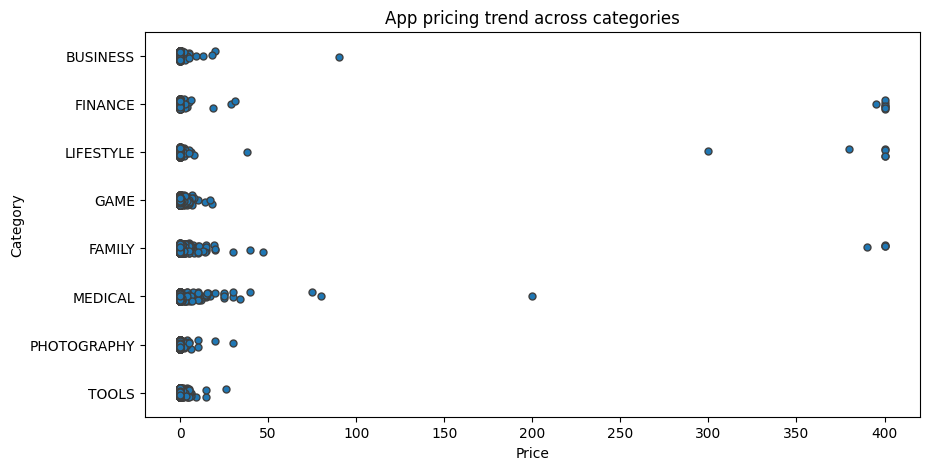

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

*1st plot:*

The table lists very expensive apps, with prices ranging from 299.99 to 400 dollars.
Most of these apps belong to LIFESTYLE, FINANCE, and FAMILY categories.
Many of these apps have names like "I'm Rich", "I Am Rich Pro", suggesting that they are novelty or status-symbol apps rather than functional applications.

*2nd plot:*

Most apps are clustered around lower price ranges (0-10 dollars) across all categories.
A few high-priced outliers (200-400 dollars) exist, particularly in Finance, Lifestyle, and Family.
There are almost no high-priced apps in Game, Tools, or Photography, indicating that these categories tend to have more affordable apps.

In [51]:
fig = px.box(apps,
             x='Type',
             y='Installs',
             color='Type',
             log_y=True,
             title="Number of downloads of Paid vs. Free apps")

fig.show(renderer="colab")

**Free Apps Have More Downloads:**
The median number of downloads for free apps is around 100k, significantly higher than paid apps (~1,000 downloads).
The upper quartile (Q3) for free apps is around 5M downloads, whereas for paid apps, it's only around 10k.

**Free Apps Have Extreme Outliers:**
Some free apps have reached over 1 billion downloads.
The upper fence (10M) still contains outliers beyond that, meaning free apps are often downloaded at a much higher scale.

**Paid Apps Have Lower and More Consistent Downloads:**
Most paid apps have install counts below 10,000.
A few outliers reach 10M installs, but these are rare.
The majority of paid apps fall within 100 - 10k installs, suggesting that people are far less likely to download paid apps compared to free ones.

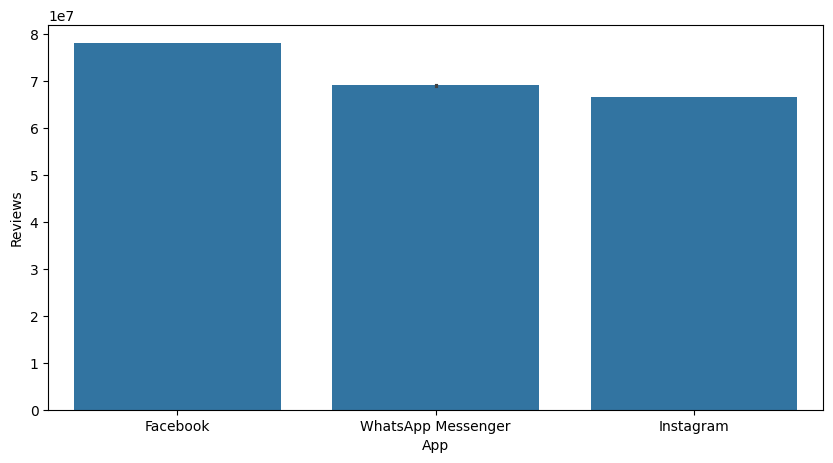

In [61]:
# Plot top 5 Free apps with highest number of reviews
plt.figure(figsize=(10, 5))
sns.barplot(x='App', y='Reviews', data=apps[apps['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5));

In [58]:
apps[apps['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

App       Category  Rating   Reviews  Size in MBs  \
2544            Facebook         SOCIAL     4.1  78158306          NaN   
3943            Facebook         SOCIAL     4.1  78128208          NaN   
336   WhatsApp Messenger  COMMUNICATION     4.4  69119316          NaN   
3904  WhatsApp Messenger  COMMUNICATION     4.4  69109672          NaN   
2604           Instagram         SOCIAL     4.5  66577446          NaN   

        Installs  Type  Price Content Rating         Genres Last Updated  \
2544  1000000000  Free    0.0           Teen         Social   2018-08-03   
3943  1000000000  Free    0.0           Teen         Social   2018-08-03   
336   1000000000  Free    0.0       Everyone  Communication   2018-08-03   
3904  1000000000  Free    0.0       Everyone  Communication   2018-08-03   
2604  1000000000  Free    0.0           Teen         Social   2018-07-31   

             Current Ver         Android Ver Installs_category  
2544  Varies with device  Varies with device         Top Notch  
3943  Varies with device  Varies with device         Top Notch  
336   Varies with device  Varies with device         Top Notch  
3904  Varies with device  Varies with device         Top Notch  
2604  Varies with device  Varies with device         Top Notch

Facebook has the highest number of reviews (78M), followed by WhatsApp Messenger (69M) and Instagram (66M).
All apps shown have 1 billion installs, reinforcing their popularity.

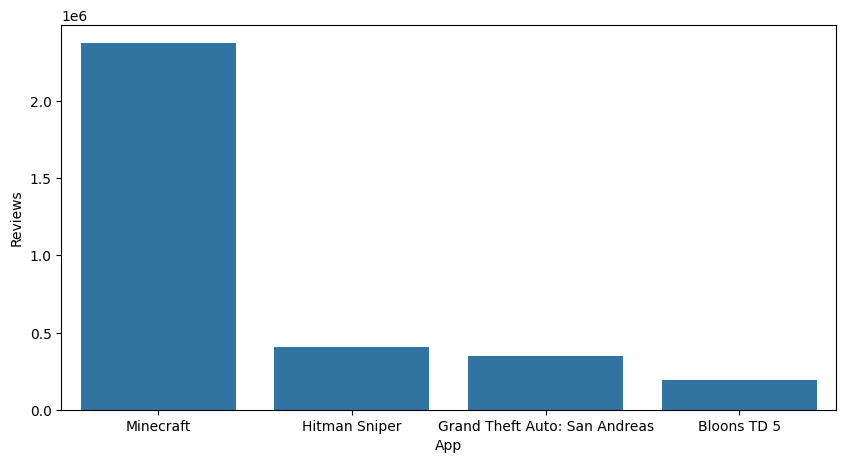

In [68]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(10, 5))
sns.barplot(x='App', y='Reviews', data=apps[apps['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5));

In [69]:
apps[apps['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)

App Category  Rating  Reviews  Size in MBs  \
2241                      Minecraft   FAMILY     4.5  2376564          NaN   
4347                      Minecraft   FAMILY     4.5  2375336          NaN   
4034                  Hitman Sniper     GAME     4.6   408292         29.0   
7417  Grand Theft Auto: San Andreas     GAME     4.4   348962         26.0   
8860                    Bloons TD 5   FAMILY     4.6   190086         94.0   

      Installs  Type  Price Content Rating                     Genres  \
2241  10000000  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
4347  10000000  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
4034  10000000  Paid   0.99     Mature 17+                     Action   
7417   1000000  Paid   6.99     Mature 17+                     Action   
8860   1000000  Paid   2.99       Everyone                   Strategy   

     Last Updated Current Ver         Android Ver Installs_category  
2241   2018-07-24     1.5.2.1  Varies with device         Very High  
4347   2018-07-24     1.5.2.1  Varies with device         Very High  
4034   2018-07-12  1.7.110758          4.1 and up         Very High  
7417   2015-03-21        1.08          3.0 and up              High  
8860   2018-07-13        3.16        2.3.3 and up              High

Minecraft dominates with over 2.3 million reviews, significantly higher than the others.
Hitman Sniper, GTA: San Andreas, and Bloons TD 5 follow but with far fewer reviews.
All apps have high install counts (1M+).

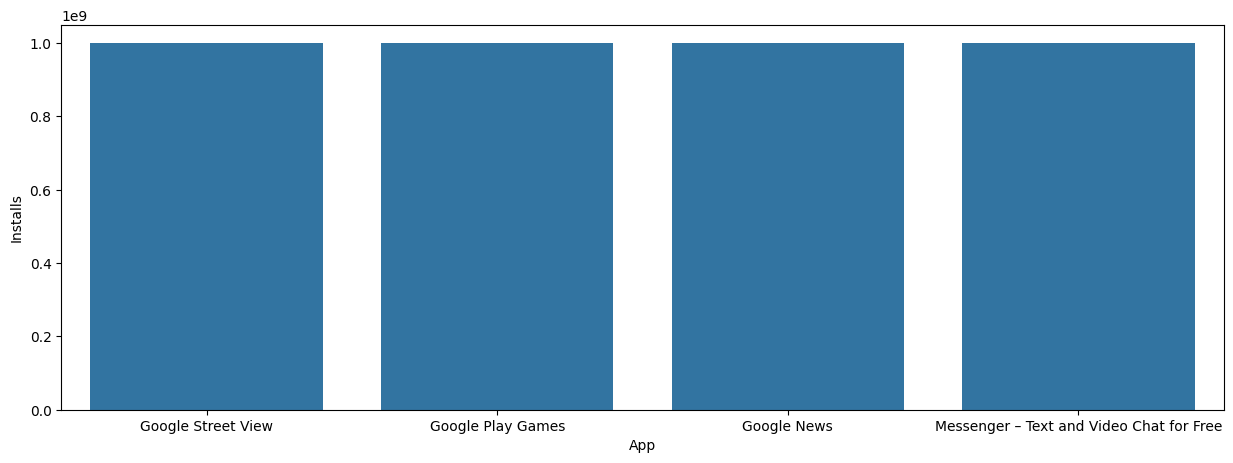

In [52]:
# Plot top 5 Free apps with highest number of installs
plt.figure(figsize=(15, 5))
sns.barplot(x='App', y='Installs', data=apps[apps['Type'] == 'Free'].sort_values(by='Installs', ascending=False).head(5));

In [51]:
apps[apps['Type'] == 'Free'].sort_values(by='Installs', ascending=False).head(5)

App            Category  Rating  \
3127                        Google Street View    TRAVEL_AND_LOCAL     4.2   
865                          Google Play Games       ENTERTAINMENT     4.3   
9844                               Google News  NEWS_AND_MAGAZINES     3.9   
5856                         Google Play Games              FAMILY     4.3   
335   Messenger – Text and Video Chat for Free       COMMUNICATION     4.0   

       Reviews  Size in MBs    Installs  Type  Price Content Rating  \
3127   2129689          NaN  1000000000  Free    0.0       Everyone   
865    7165362          NaN  1000000000  Free    0.0           Teen   
9844    878065         13.0  1000000000  Free    0.0           Teen   
5856   7168735          NaN  1000000000  Free    0.0           Teen   
335   56642847          NaN  1000000000  Free    0.0       Everyone   

                Genres Last Updated         Current Ver         Android Ver  \
3127    Travel & Local   2018-08-06  Varies with device  Varies with device   
865      Entertainment   2018-07-16  Varies with device  Varies with device   
9844  News & Magazines   2018-08-01               5.2.0          4.4 and up   
5856     Entertainment   2018-07-16  Varies with device  Varies with device   
335      Communication   2018-08-01  Varies with device  Varies with device   

     Installs_category  
3127         Top Notch  
865          Top Notch  
9844         Top Notch  
5856         Top Notch  
335          Top Notch

The top free apps by installs include Google Street View, Google Play Games, and Google News Messenger, but may not be reviewed as much.

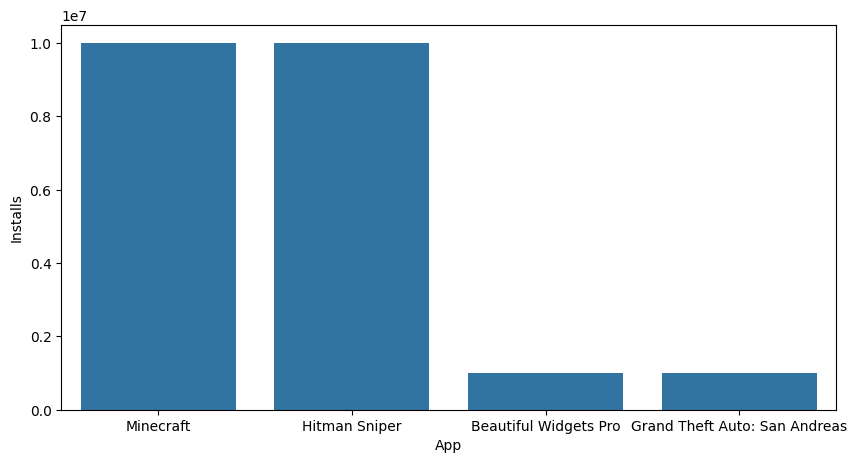

In [53]:
# Plot top 5 Free apps with highest number of installs
plt.figure(figsize=(10, 5))
sns.barplot(x='App', y='Installs', data=apps[apps['Type'] == 'Paid'].sort_values(by='Installs', ascending=False).head(5));

In [47]:
apps[apps['Type'] == 'Paid'].sort_values(by='Installs', ascending=False).head(5)

App         Category  Rating  Reviews  \
2241                      Minecraft           FAMILY     4.5  2376564   
4347                      Minecraft           FAMILY     4.5  2375336   
4034                  Hitman Sniper             GAME     4.6   408292   
3403          Beautiful Widgets Pro  PERSONALIZATION     4.2    97890   
7417  Grand Theft Auto: San Andreas             GAME     4.4   348962   

      Size in MBs  Installs  Type  Price Content Rating  \
2241          NaN  10000000  Paid   6.99   Everyone 10+   
4347          NaN  10000000  Paid   6.99   Everyone 10+   
4034         29.0  10000000  Paid   0.99     Mature 17+   
3403         14.0   1000000  Paid   2.49       Everyone   
7417         26.0   1000000  Paid   6.99     Mature 17+   

                         Genres Last Updated Current Ver         Android Ver  \
2241  Arcade;Action & Adventure   2018-07-24     1.5.2.1  Varies with device   
4347  Arcade;Action & Adventure   2018-07-24     1.5.2.1  Varies with device   
4034                     Action   2018-07-12  1.7.110758          4.1 and up   
3403            Personalization   2016-08-24       5.7.8          2.3 and up   
7417                     Action   2015-03-21        1.08          3.0 and up   

     Installs_category  
2241         Very High  
4347         Very High  
4034         Very High  
3403              High  
7417              High

Again, 'Minecraft' and 'Hitman Sniper' rank among the most installed paid apps.

<Axes: xlabel='Installs_category', ylabel='Size in MBs'>

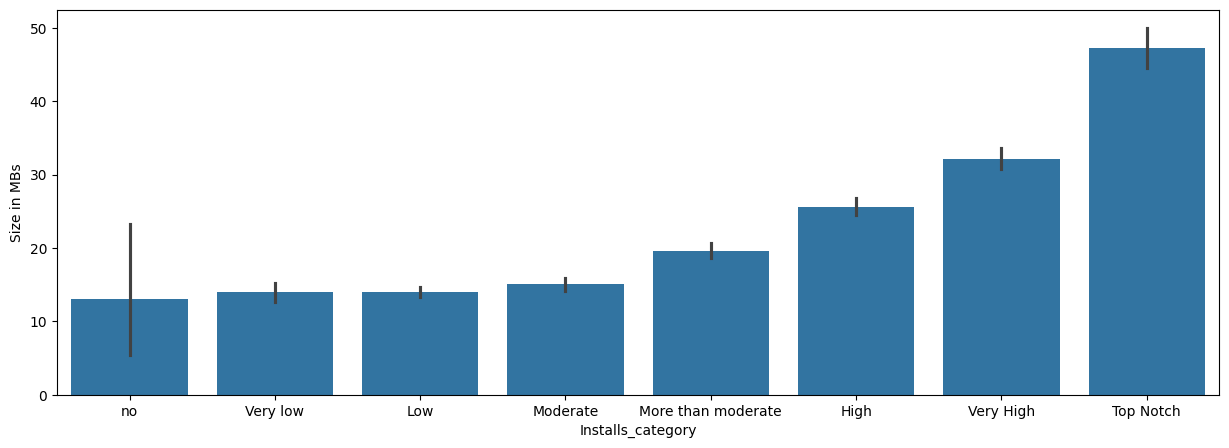

In [66]:
# Check if there is any impact of size on installs
plt.figure(figsize=(15, 5))
sns.barplot(x='Installs_category', y='Size in MBs', data=apps)

**Larger Apps Tend to Have More Installs:**
Apps in the "Top Notch" install category have the largest average size.
Smaller apps are mostly in "Low" or "Very Low" install categories.

**Steady increase in App Size with More Installs:**
The trend suggests that higher installs correlate with larger app sizes.
This could be due to feature-rich applications having large file sizes.

Some Small Apps Still Get High Installs.

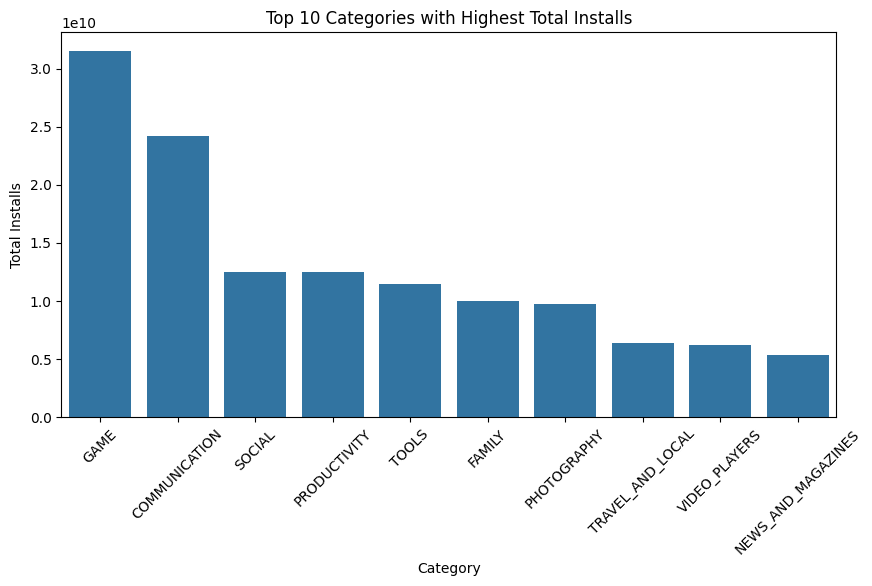

In [41]:
# Category with highest number of Installs
top_categories = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x=top_categories.index, y=top_categories.values)

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.title("Top 10 Categories with Highest Total Installs")

plt.show()

"Game" is the most downloaded category, surpassing 30 billion installs.
"Communication" follows closely, with around 25 billion installs:
Messaging and calling apps contribute significantly.
"Social" and "Productivity" apps also have high install counts, each exceeding 10 billion.
Categories like "Photography", "Travel and Local", and "Video Players" have fewer installs but still rank in the top 10.

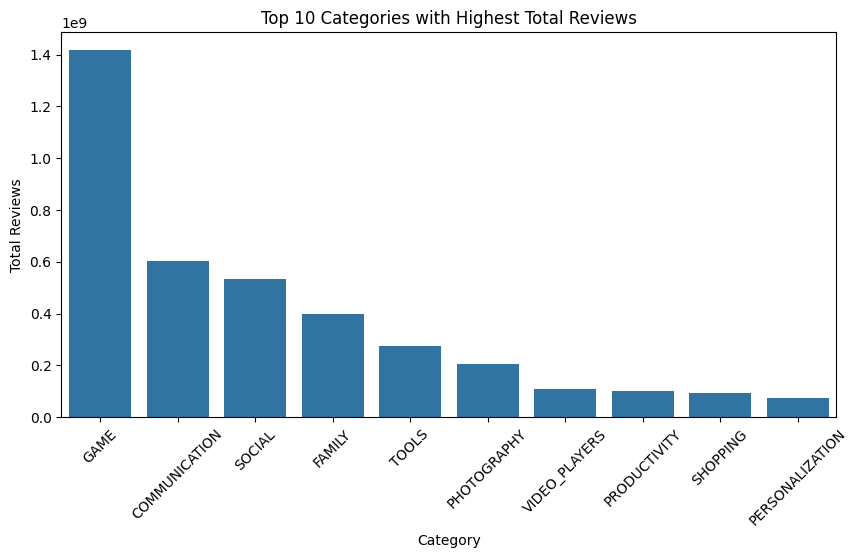

In [42]:
# Category with highest number of Reviews
top_categories = apps.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x=top_categories.index, y=top_categories.values)

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Reviews")
plt.title("Top 10 Categories with Highest Total Reviews")

plt.show()

Most downloaded categories also tend to receive the highest reviews.

# EDA of googleplaystore_user_reviews.csv

In [20]:
user_reviews = pd.read_csv("/content/extracted_folder/googleplaystore_user_reviews.csv")
user_reviews

App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                    1.00                0.533333  
1                    0.25                0.288462  
2                     NaN                     NaN  
3                    0.40                0.875000  
4                    1.00                0.300000  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[64295 rows x 5 columns]

In [21]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


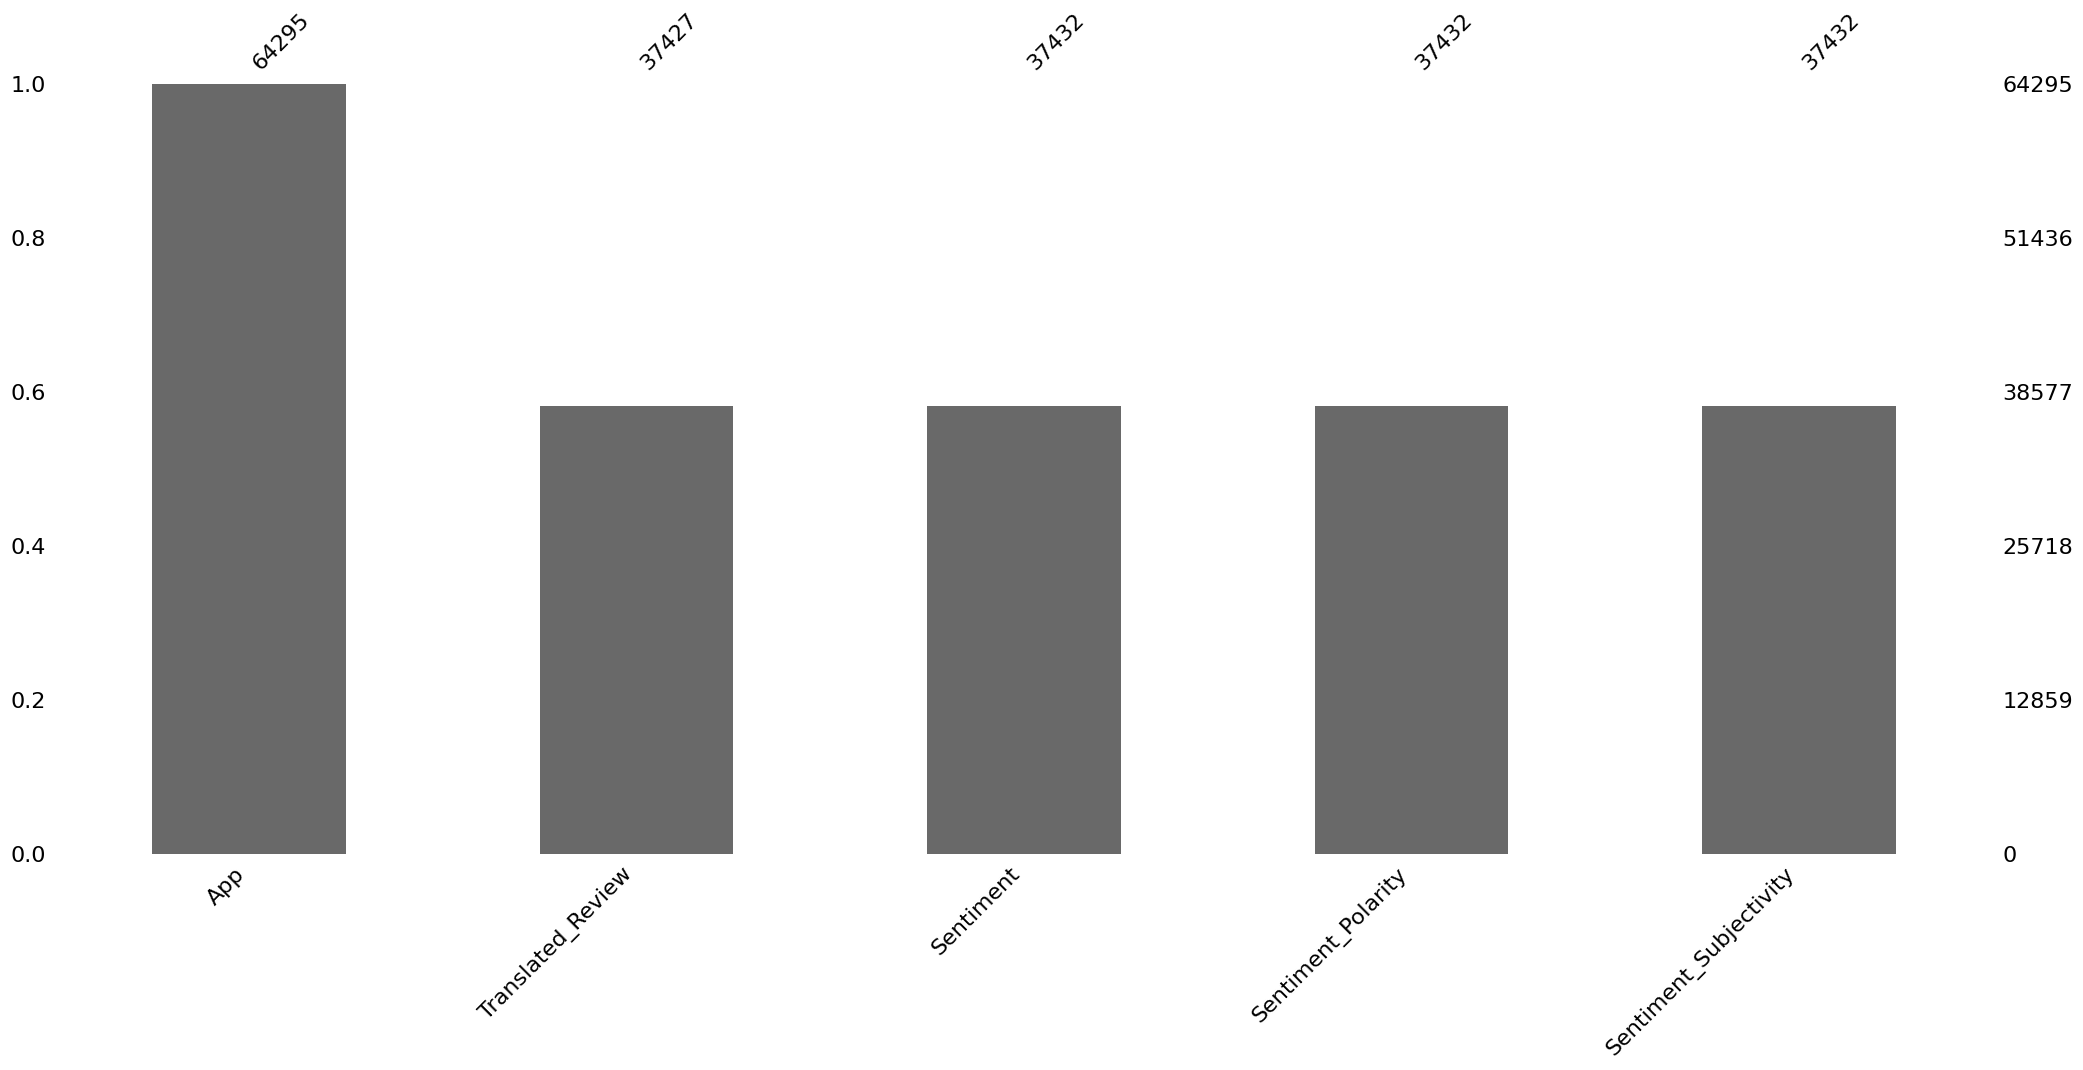

In [22]:
missingno.bar(user_reviews)
plt.show()

In [24]:
user_reviews = user_reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='all')

user_reviews

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads older many agents ..not much owner po...  Positive   
64223  If photos posted portal load, fit purpose. I'm...  Positive   
64226  Dumb app, I wanted post property rent give opt...  Negative   
64227  I property business got link SMS happy perform...  Positive   
64230  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
3                0.400000                0.875000  
4                1.000000                0.300000  
5                1.000000                0.300000  
...                   ...                     ...  
64222            0.173333                0.486667  
64223            0.225000                0.447222  
64226           -0.287500                0.250000  
64227            0.800000                1.000000  
64230           -0.316667                0.400000  

[37432 rows x 5 columns]

In [25]:
user_reviews.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [26]:
user_reviews[user_reviews.isnull().any(axis=1)]

App Translated_Review Sentiment  \
268                                         11st               NaN   Neutral   
15048        Birds Sounds Ringtones & Wallpapers               NaN   Neutral   
22092             Calorie Counter - MyFitnessPal               NaN   Neutral   
31623                                  DC Comics               NaN   Neutral   
52500  Garden Photo Frames - Garden Photo Editor               NaN   Neutral   

       Sentiment_Polarity  Sentiment_Subjectivity  
268                   0.0                     0.0  
15048                 0.0                     0.0  
22092                 0.0                     0.0  
31623                 0.0                     0.0  
52500                 0.0                     0.0

In [27]:
user_reviews = user_reviews.dropna(subset=['Translated_Review'])
user_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [64]:
user_reviews.shape

(37427, 5)

We cleaned the dataset by removing rows where all features were NaNs. Additionally, we deleted the five rows shown above, as they lacked meaningful information and would not contribute to the analysis.

In [86]:
user_reviews.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37427.000000            37427.000000
mean             0.182171                0.492770
std              0.351318                0.259904
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

In [67]:
merged_df = pd.merge(apps, user_reviews, on = "App")
fig = px.box(merged_df,
             x='Type',
             y='Sentiment_Polarity',
             color='Type',
             title="Sentiment Polarity Distribution")

fig.show(renderer="colab")

We observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative, suggesting that users may have higher expectations for paid apps, leading to generally more positive feedback.

The median polarity score for paid apps is slightly higher (around 0.23) than for free apps (around 0.125), suggesting that paid apps tend to receive more favorable reviews on average.

Paid apps generally perceived as higher quality compared to free apps. However, free apps attract a larger and more varied user base, which could contribute to more extreme and diverse feedback.

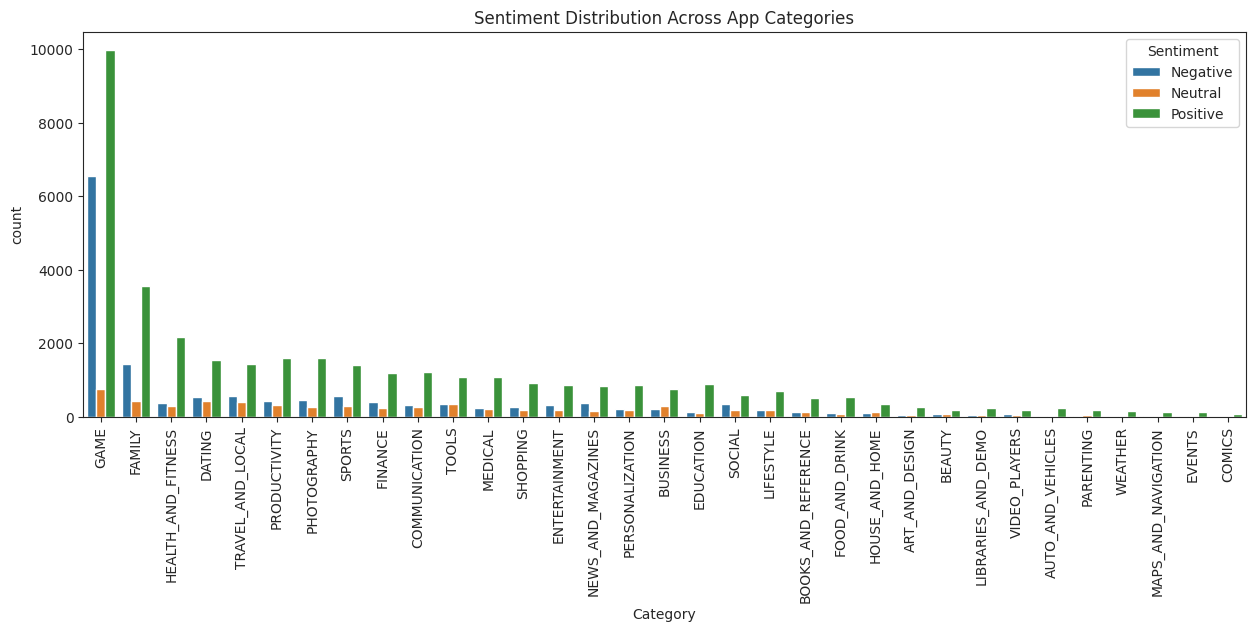

In [70]:
# Compare sentiment distribution across different app categories
plt.figure(figsize=(15, 5))
sns.countplot(data=merged_df, x='Category', hue='Sentiment', order=merged_df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Sentiment Distribution Across App Categories")
plt.show()

* "GAME" and "FAMILY" categories dominate in terms of review volume, with "GAME" receiving the highest number of negative reviews.

* Most app categories have a higher number of positive reviews compared to negative and neutral reviews.

In [85]:
# Identify apps with the highest percentage of positive and negative reviews
sentiment_counts = user_reviews.groupby(['App', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)
sentiment_counts['Positive %'] = (sentiment_counts['Positive'] / sentiment_counts['Total']) * 100
sentiment_counts['Negative %'] = (sentiment_counts['Negative'] / sentiment_counts['Total']) * 100

most_positive_apps = sentiment_counts.sort_values(by='Positive %', ascending=False).head(10)
most_negative_apps = sentiment_counts.sort_values(by='Negative %', ascending=False).head(10)
print("Most Positive Apps:")
print(most_positive_apps[['Positive %']])
print("-------------------")
print("Most Negative Apps:")
print(most_negative_apps[['Negative %']])

Most Positive Apps:
Sentiment                                           Positive %
App                                                           
Google Primer                                            100.0
Drawing for Kids Learning Games for Toddlers age 3       100.0
Caf - Mon Compte                                         100.0
Calculator - unit converter                              100.0
FlipaClip - Cartoon animation                            100.0
Calculator Plus Free                                     100.0
HomeWork                                                 100.0
Home workouts - fat burning, abs, legs, arms,chest       100.0
Calendar+ Schedule Planner App                           100.0
CallApp: Caller ID, Blocker & Phone Call Recorder        100.0
-------------------
Most Negative Apps:
Sentiment                                         Negative %
App                                                         
Discover Mobile                                   100.000000
C

* Several apps have a 100% positive review rate.

* On the other hand, apps like "Discover Mobile",  "Call of Duty: Black Ops Zombies" have 100% negative reviews.

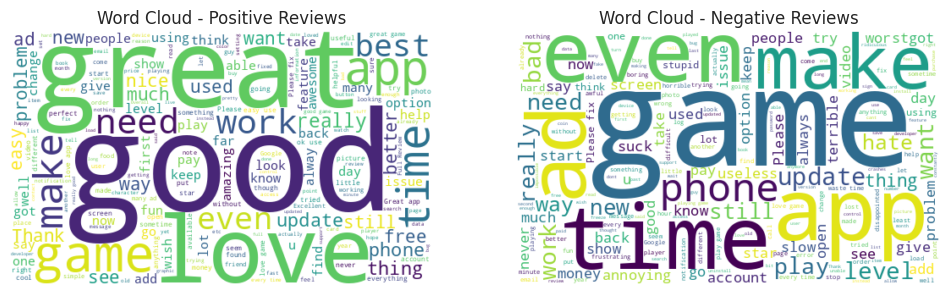

In [79]:
# Word Cloud visualization for positive and negative reviews separately
positive_reviews = " ".join(user_reviews[user_reviews['Sentiment'] == 'Positive']['Translated_Review'])
negative_reviews = " ".join(user_reviews[user_reviews['Sentiment'] == 'Negative']['Translated_Review'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(negative_reviews), interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")

plt.show()

* The left cloud (positive reviews) includes words like "great", "love", "game", "best" and "app", suggesting users appreciate these aspects.

* The right cloud (negative reviews) includes words like "even", "game", "time", "update", "ad" and "problem", which may indicate common complaints about updates, time-consuming processes, or usability issues.

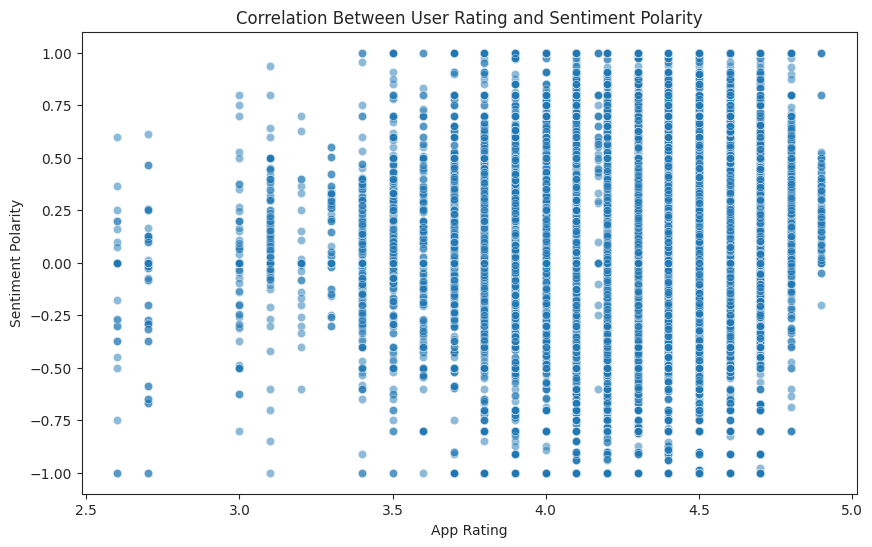

In [80]:
# Correlation between user rating and sentiment polarity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Rating', y='Sentiment_Polarity', alpha=0.5)
plt.title("Correlation Between User Rating and Sentiment Polarity")
plt.xlabel("App Rating")
plt.ylabel("Sentiment Polarity")
plt.show()

* Higher-rated apps tend to have more positive sentiment polarity.
* Apps with lower ratings (below 3.5) have a wider spread of sentiment polarity, including many negative sentiments (below zero).
* There are still negative sentiment reviews even for highly-rated apps, suggesting that even good apps receive some criticism.
* The plot does not strongly indicate a linear relationship between rating and sentiment polarity.

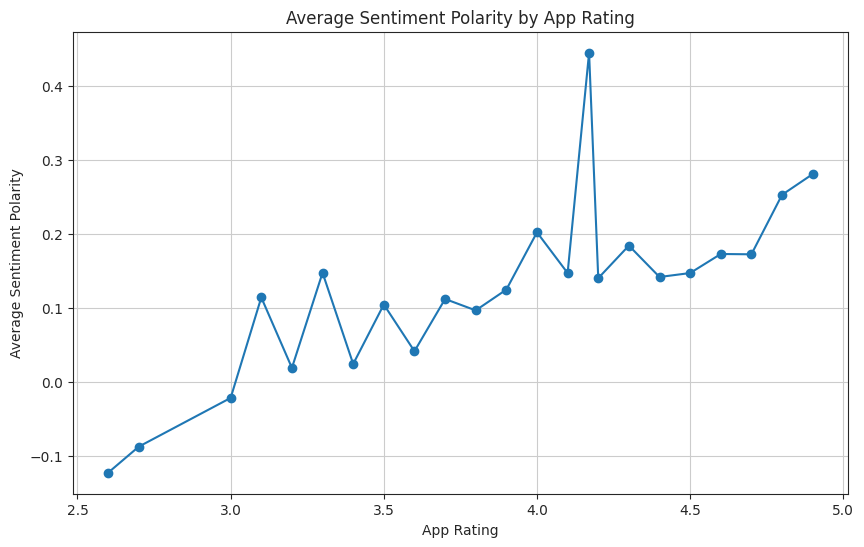

In [81]:
# Check whether apps with higher star ratings have more positive sentiment in reviews
rating_sentiment = merged_df.groupby('Rating')['Sentiment_Polarity'].mean()
plt.figure(figsize=(10, 6))
plt.plot(rating_sentiment, marker='o')
plt.title("Average Sentiment Polarity by App Rating")
plt.xlabel("App Rating")
plt.ylabel("Average Sentiment Polarity")
plt.grid()
plt.show()

* Apps rated below 3 tend to have negative sentiment polarity, while those rated above 4 generally have a more positive polarity.
* The correlation suggests that better-rated apps tend to receive more positive sentiment in their reviews.

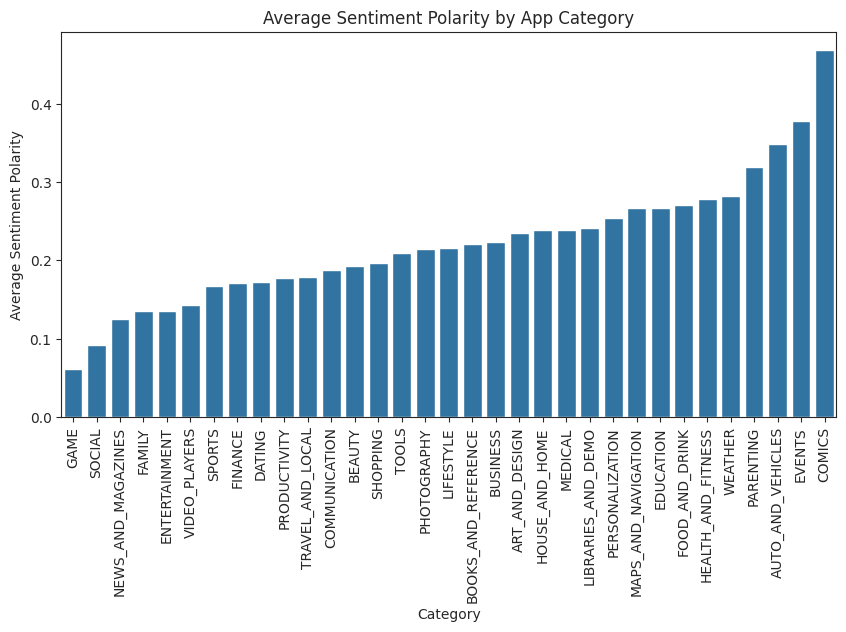

In [83]:
# Compare average sentiment polarity per app category
category_sentiment = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values)
plt.xticks(rotation=90)
plt.title("Average Sentiment Polarity by App Category")
plt.ylabel("Average Sentiment Polarity")
plt.show()

* Categories such as "COMICS," "EVENTS," and "AUTO_AND_VEHICLES" have the highest sentiment polarity, indicating high satisfaction.
* The "GAME" category has the lowest polarity, which aligns with previous observations that games receive a lot of mixed reviews.

In [111]:
# Identify most subjective and most objective categories
most_subjective_categories = merged_df.groupby("Category")["Sentiment_Subjectivity"].mean().sort_values(ascending=False).head(10)
least_subjective_categories = merged_df.groupby("Category")["Sentiment_Subjectivity"].mean().sort_values(ascending=True).head(10)

most_subjective_df = most_subjective_categories.to_frame().reset_index()
least_subjective_df = least_subjective_categories.to_frame().reset_index()

print("Most Subjective Categories:")
print(most_subjective_df)
print("---------------------------------------------")
print("\nLeast Subjective Categories:")
print(least_subjective_df)

Most Subjective Categories:
             Category  Sentiment_Subjectivity
0              COMICS                0.593556
1              EVENTS                0.576808
2      ART_AND_DESIGN                0.537098
3   AUTO_AND_VEHICLES                0.529918
4  LIBRARIES_AND_DEMO                0.525975
5     PERSONALIZATION                0.523309
6      FOOD_AND_DRINK                0.522017
7  HEALTH_AND_FITNESS                0.506031
8         PHOTOGRAPHY                0.505951
9              FAMILY                0.505465
---------------------------------------------

Least Subjective Categories:
              Category  Sentiment_Subjectivity
0             BUSINESS                0.442212
1  MAPS_AND_NAVIGATION                0.462786
2               SOCIAL                0.467711
3                TOOLS                0.472247
4  BOOKS_AND_REFERENCE                0.473689
5        ENTERTAINMENT                0.474363
6         PRODUCTIVITY                0.474951
7   NEWS_AND_M

**Most Subjective Categories:**
Comics, Events, Art and Design, Auto and Vehicles, etc have the highest subjectivity.
These app categories involve creative expression, user experience, and personal preferences, which lead to more opinion-based reviews.

**Least Subjective Categories:**
Business, Maps and Navigation, Social, Tools, Books and Reference have the lowest subjectivity.
These categories are functionality-driven, where users focus on whether the app works correctly rather than their personal opinions.
Reviews are more factual, highlighting performance, efficiency, or usability rather than emotional responses.

In [120]:
# Identify most subjective and most objective categories
most_subjective_categories = merged_df.groupby("App")["Sentiment_Subjectivity"].mean().sort_values(ascending=False).head(10)
least_subjective_categories = merged_df.groupby("App")["Sentiment_Subjectivity"].mean().sort_values(ascending=True).head(10)

most_subjective_df = most_subjective_categories.to_frame().reset_index()
least_subjective_df = least_subjective_categories.to_frame().reset_index()

print("Most Subjective Apps:")
print(most_subjective_df)
print("-" * 76)
print("\nLeast Subjective Apps:")
print(least_subjective_df)

Most Subjective Apps:
                                                 App  Sentiment_Subjectivity
0                                      Google Slides                0.916667
1  Daily Workouts - Exercise Fitness Routine Trainer                0.750000
2                                      Choice Hotels                0.719206
3                                       HTC Calendar                0.694949
4                       Hitwe - meet people and chat                0.694105
5                             850 Sports News Digest                0.692420
6                                 Google Street View                0.691667
7  CM Browser - Ad Blocker , Fast Download , Privacy                0.687500
8                      FlipaClip - Cartoon animation                0.679226
9                                      Google Primer                0.675000
----------------------------------------------------------------------------

Least Subjective Apps:
                              

**Most Subjective Apps:**
Google Slides, Daily Workouts, Choice Hotels, HTC Calendar have the highest subjectivity.
These apps relate to personal productivity, fitness, travel, or creativity, where users express preferences, frustrations, and experiences.

**Least Subjective Apps:**
HD Camera, CBS News, Google Trips, Calculator, Google Voice have the lowest subjectivity.
These apps are utility-based, meaning users focus on functionality rather than personal opinions.